In [6]:
# Dimitrios Bakalis, A.M : 3033

import pandas as pd 
from pandas import DataFrame

import numpy as np

import sklearn
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import sklearn.metrics as metrics
import sklearn.cluster as sk_cluster

import seaborn as sns

import matplotlib.pyplot as plt

import time

import math
import operator
import json 
import random
import nltk

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

import seaborn as sns

from sklearn.model_selection import train_test_split

classifiers = [
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),                             
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),                   
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]                

names = ["Gradient Boosting","Nearest Neighbors", "RBF SVM",  
        "Decision Tree", "AdaBoost", "Random Forest", "MLP", 
        "Naive Bayes", "QDA","Logistic Regression"]              

def neural_networks_accuracy(data,real_labels):

    log_cols=["Classifier", "Accuracy"]
    log = pd.DataFrame(columns=log_cols)

    X_train, X_test, y_train, y_test = train_test_split(data, real_labels, test_size=0.3,random_state=109) # 70% of our data for training and the rest 30% for testing

    print("==============================")

    name_flag = -1
    for classifier in classifiers: 
        name_flag+=1

        start_time = time.time()

        scores = cross_val_score(classifier, X_train, y_train, cv=10)  # 10-k fold validation
        train_acc = scores.mean()                                      # we calculate the mean train accuracy score

        print(names[name_flag])
        print('****Results****')

        print("train accuracy score",train_acc)

        classifier.fit(X_train, y_train)

        test_acc = classifier.score(X_test, y_test)

        print("test accuracy score ", test_acc)
        
        log_entry = pd.DataFrame([[names[name_flag], test_acc*100]], columns=log_cols)
        log = log.append(log_entry)

        print("--- %s seconds ---" % (time.time() - start_time))

        print("==============================")

    log = log.sort_values(by=['Accuracy'], ascending=False)

    sns.set_color_codes("muted")
    sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

    plt.xlabel('Accuracy %')
    plt.title('Classifier Accuracy')
    plt.show()

In [2]:
xls = pd.ExcelFile('LOX_VS_ANTIOXIDANTS_VS_TEST.xlsx')

In [3]:
df_train_LOX = pd.read_excel(xls, 'training_set_LOX')
df_train_Antioxidant = pd.read_excel(xls, 'training_set_antioxidant')
df_LOX_decoys = pd.read_excel(xls, 'LOX_decoys')
df_Antioxidant_decoys = pd.read_excel(xls, 'Antioxidants_decoys')
df_test_set = pd.read_excel(xls, 'test_set')

In [4]:
df_train_LOX.head(5)

,Title,class,i_desc_Atom_Count,i_desc_Atoms_in_Ring_System,i_desc_Bond_Count,i_desc_Bonds_in_Ring_System,i_desc_Centralization,i_desc_Chirality_count,i_desc_Cyclomatic_number,i_desc_Eccentric_connectivity,...,r_qp_SAamideO,r_qp_SAfluorine,r_qp_WPSA,r_qp_accptHB,r_qp_dip^2/V,r_qp_dipole,r_qp_donorHB,r_qp_glob,r_qp_mol_MW,r_qp_volume
0,CHEMBL1922653,1,45,27,49,28,5138,0,5,1480,...,0.0,0.000,9.420,5.25,0.0,0.0,1.0,0.736990,623.809,1938.963
1,CHEMBL1922653,1,45,27,49,28,5138,0,5,1480,...,0.0,0.000,9.420,5.25,0.0,0.0,1.0,0.736990,623.809,1938.963
2,CHEMBL1922653,1,45,27,49,28,5138,0,5,1480,...,0.0,0.000,9.420,5.25,0.0,0.0,1.0,0.736990,623.809,1938.963
3,CHEMBL1922655,1,47,27,51,28,5798,0,5,1562,...,0.0,119.104,126.691,5.25,0.0,0.0,1.0,0.762411,661.781,1935.953
4,CHEMBL1922656,1,45,26,49,27,5202,0,5,1545,...,0.0,0.000,62.557,5.75,0.0,0.0,1.0,0.727460,643.858,1967.735


In [5]:
def extract_labels(tmp_df):
    tmp_labels = tmp_df['class'].tolist()
    return (tmp_labels)

In [6]:
def list_to_array_transformation(tmp_list):
    i=-1
    for compound in tmp_list:
        i+=1
        tmp_list[i]=compound[2:]

    tmp_array = np.array(tmp_list) 
    tmp_array = np.nan_to_num(tmp_array)       # we replace the Nan values with zeros            

    return (tmp_array)

In [7]:
lox_labels = extract_labels(df_train_LOX)           # list that holds the labels of the lox compounds
lox_list = df_train_LOX.values.tolist()             # list that holds the values of the lox compounds from our dataframe
lox_array = list_to_array_transformation(lox_list)  # we transform our lox list into an array
print("lox array dimensions",lox_array.shape)

lox array dimensions (4383, 277)


In [8]:
antioxidant_labels = extract_labels(df_train_Antioxidant)           # list that holds the labels of the antioxidant compounds
antioxidant_list = df_train_Antioxidant.values.tolist()             # list that holds the values of the antioxidants compounds from our dataframe
antioxidant_array = list_to_array_transformation(antioxidant_list)  # we transform our antioxidants list into an array
print("antioxidant array dimensions",antioxidant_array.shape)

antioxidant array dimensions (469, 277)


In [9]:
lox_decoy_labels = extract_labels(df_LOX_decoys)                # list that holds the labels of the lox decoys compounds
lox_decoy_list = df_LOX_decoys.values.tolist()                  # list that holds the values of the lox decoys compounds from our dataframe
lox_decoy_array = list_to_array_transformation(lox_decoy_list)  # we transform our lox decoy list into an array
print("lox decoys array dimensions",lox_decoy_array.shape)

lox decoys array dimensions (3799, 277)


In [10]:
antioxidant_decoys_labels = extract_labels(df_Antioxidant_decoys)                 # list that holds the labels of the antioxidant decoys compounds
antioxidant_decoys_list = df_Antioxidant_decoys.values.tolist()                   # list that holds the values of the antioxidants decoys compounds from our dataframe
antioxidant_decoys_array = list_to_array_transformation(antioxidant_decoys_list)  # we transform our antioxidants list into an array
print("antioxidant decoys array dimensions",antioxidant_decoys_array.shape)

antioxidant decoys array dimensions (1128, 277)


In [11]:
data = np.concatenate((lox_array, antioxidant_array))   # lox vs antioxidant
print(data.shape)
real_labels = lox_labels + antioxidant_labels

(4852, 277)


Gradient Boosting
****Results****
train accuracy score 0.9796824570536179
test accuracy score  0.9855769230769231
--- 109.00315546989441 seconds ---
Nearest Neighbors
****Results****
train accuracy score 0.9414055179593961
test accuracy score  0.9381868131868132
--- 0.5943999290466309 seconds ---
RBF SVM
****Results****
train accuracy score 0.905773034877668
test accuracy score  0.9024725274725275
--- 3.558459997177124 seconds ---
Decision Tree
****Results****
train accuracy score 0.9758563248308173
test accuracy score  0.9807692307692307
--- 5.07901668548584 seconds ---
AdaBoost
****Results****
train accuracy score 0.9785094568800972
test accuracy score  0.9745879120879121
--- 23.155705451965332 seconds ---
Random Forest
****Results****
train accuracy score 0.986456706576436
test accuracy score  0.9883241758241759
--- 16.54275345802307 seconds ---
MLP
****Results****
train accuracy score 0.9072531667534272
test accuracy score  0.9532967032967034
--- 11.151094913482666 seconds ---
Naiv

C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitri

QDA
****Results****
train accuracy score 0.9528847822314767
test accuracy score  0.9491758241758241
--- 1.8311161994934082 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

Logistic Regression
****Results****
train accuracy score 0.9284478570189136
test accuracy score  0.9258241758241759
--- 1.0760962963104248 seconds ---


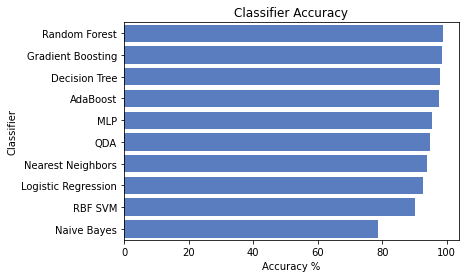

In [30]:
neural_networks_accuracy(data,real_labels)

In [12]:
data = np.concatenate((lox_array, lox_decoy_array))    # lox vs lox_decoys
print(data.shape)
real_labels = lox_labels + lox_decoy_labels

(8182, 277)


Gradient Boosting
****Results****
train accuracy score 0.9111262646602961
test accuracy score  0.9103869653767821
--- 201.02843737602234 seconds ---
Nearest Neighbors
****Results****
train accuracy score 0.8168353897411489
test accuracy score  0.8228105906313645
--- 1.3127145767211914 seconds ---
RBF SVM
****Results****
train accuracy score 0.6404764519947765
test accuracy score  0.6329938900203665
--- 59.08207702636719 seconds ---
Decision Tree
****Results****
train accuracy score 0.9366153480027826
test accuracy score  0.9425661914460285
--- 8.986000061035156 seconds ---
AdaBoost
****Results****
train accuracy score 0.8638053918158631
test accuracy score  0.8574338085539714
--- 42.77694916725159 seconds ---
Random Forest
****Results****
train accuracy score 0.9572209204408157
test accuracy score  0.9653767820773931
--- 29.742682933807373 seconds ---
MLP
****Results****
train accuracy score 0.7516890613749252
test accuracy score  0.7474541751527495
--- 20.037892818450928 seconds ---
N

C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitri

QDA
****Results****
train accuracy score 0.7728343645882914


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


test accuracy score  0.7486761710794297
--- 2.6604220867156982 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Logistic Regression
****Results****
train accuracy score 0.7049082244108422
test accuracy score  0.6892057026476578
--- 1.9470200538635254 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


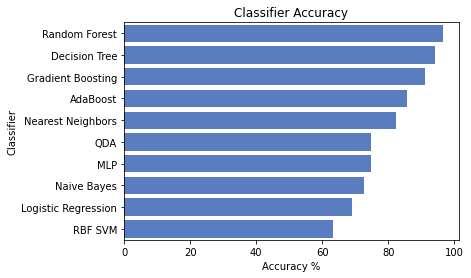

In [32]:
neural_networks_accuracy(data,real_labels)

In [13]:
data = np.concatenate((antioxidant_array, antioxidant_decoys_array))  # antioxidant vs antioxidant_decoys
print(data.shape)
real_labels = antioxidant_labels + antioxidant_decoys_labels

(1597, 277)


Gradient Boosting
****Results****
train accuracy score 0.8979166666666668
test accuracy score  0.89375
--- 35.16112923622131 seconds ---
Nearest Neighbors
****Results****
train accuracy score 0.7582689832689833
test accuracy score  0.7833333333333333
--- 0.1138308048248291 seconds ---
RBF SVM
****Results****
train accuracy score 0.6947232947232946
test accuracy score  0.725
--- 1.0940935611724854 seconds ---
Decision Tree
****Results****
train accuracy score 0.8486486486486486
test accuracy score  0.86875
--- 1.0382299423217773 seconds ---
AdaBoost
****Results****
train accuracy score 0.8469192406692407
test accuracy score  0.875
--- 7.981029987335205 seconds ---
Random Forest
****Results****
train accuracy score 0.8934443371943372
test accuracy score  0.9104166666666667
--- 5.0908753871917725 seconds ---
MLP
****Results****
train accuracy score 0.5935810810810811
test accuracy score  0.7875
--- 3.8266074657440186 seconds ---
Naive Bayes
****Results****
train accuracy score 0.549686293

C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitri

QDA
****Results****
train accuracy score 0.7618243243243243
test accuracy score  0.8104166666666667
--- 1.416750431060791 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

Logistic Regression
****Results****
train accuracy score 0.7438867438867438
test accuracy score  0.78125
--- 0.5636012554168701 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


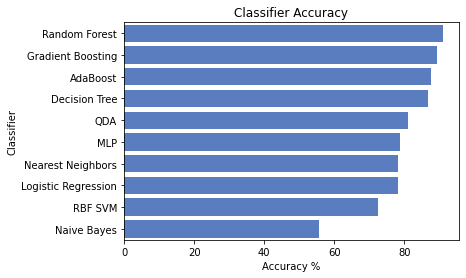

In [34]:
neural_networks_accuracy(data,real_labels)

In [65]:
data = np.concatenate((lox_array, antioxidant_array, lox_decoy_array))   # lox vs antioxidant vs lox_decoys
print(data.shape)
real_labels = lox_labels + antioxidant_labels + lox_decoy_labels

(8651, 277)


Gradient Boosting
****Results****
train accuracy score 0.9063592722908653
test accuracy score  0.9060092449922958
--- 665.7536735534668 seconds ---
Nearest Neighbors
****Results****
train accuracy score 0.7895993235687205
test accuracy score  0.7862095531587057
--- 1.5376060009002686 seconds ---
RBF SVM
****Results****
train accuracy score 0.6092466519379212
test accuracy score  0.5947611710323575
--- 70.72310733795166 seconds ---
Decision Tree
****Results****
train accuracy score 0.9218784605733299
test accuracy score  0.9295069337442219
--- 9.738977432250977 seconds ---
AdaBoost
****Results****
train accuracy score 0.7222180399858168
test accuracy score  0.7299691833590138
--- 46.98925590515137 seconds ---
Random Forest
****Results****
train accuracy score 0.9489643509805527
test accuracy score  0.9572419106317411
--- 33.16331672668457 seconds ---
MLP
****Results****
train accuracy score 0.6207885333987945
test accuracy score  0.7384437596302003
--- 21.601013898849487 seconds ---
Nai

C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitri

QDA
****Results****
train accuracy score 0.8346881051741537


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


test accuracy score  0.8112480739599384
--- 3.1588892936706543 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Logistic Regression
****Results****
train accuracy score 0.6450912363963669


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


test accuracy score  0.6286594761171033
--- 4.7388527393341064 seconds ---


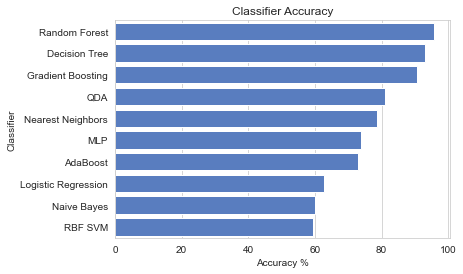

In [66]:
neural_networks_accuracy(data,real_labels)

In [71]:
data = np.concatenate((lox_array, antioxidant_array, antioxidant_decoys_array))   # lox vs antioxidant vs antioxidant_decoys
print(data.shape)
real_labels = lox_labels + antioxidant_labels + antioxidant_decoys_labels

(5980, 277)


Gradient Boosting
****Results****
train accuracy score 0.9374124995717761
test accuracy score  0.9453734671125975
--- 420.55153036117554 seconds ---
Nearest Neighbors
****Results****
train accuracy score 0.825613502186797
test accuracy score  0.8405797101449275
--- 0.8397557735443115 seconds ---
RBF SVM
****Results****
train accuracy score 0.7310091240250768
test accuracy score  0.7486064659977704
--- 15.6683509349823 seconds ---
Decision Tree
****Results****
train accuracy score 0.9187750511013919
test accuracy score  0.9264214046822743
--- 6.435953617095947 seconds ---
AdaBoost
****Results****
train accuracy score 0.8385087528976488
test accuracy score  0.8299888517279822
--- 30.51294732093811 seconds ---
Random Forest
****Results****
train accuracy score 0.9472045540190246
test accuracy score  0.9559643255295429
--- 22.372178077697754 seconds ---
MLP
****Results****
train accuracy score 0.7644328601934429
test accuracy score  0.7993311036789298
--- 16.283928394317627 seconds ---
Nai

C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitri

QDA
****Results****
train accuracy score 0.8882061413024861


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


test accuracy score  0.9280936454849499
--- 2.7746636867523193 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Logistic Regression
****Results****
train accuracy score 0.753220815110025


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


test accuracy score  0.7798216276477146
--- 3.427219867706299 seconds ---


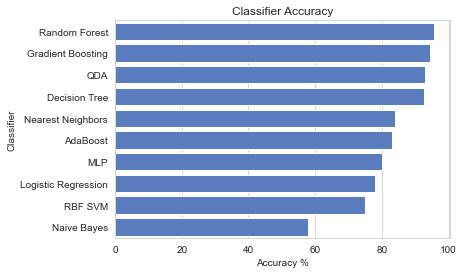

In [72]:
neural_networks_accuracy(data,real_labels)

In [14]:
all_data = np.concatenate((lox_array, lox_decoy_array, antioxidant_array, antioxidant_decoys_array))  # all the classes
print(all_data.shape)
all_labels = lox_labels + lox_decoy_labels + antioxidant_labels + antioxidant_decoys_labels

(9779, 277)


Gradient Boosting
****Results****
train accuracy score 0.8835691723225338
test accuracy score  0.8940013633265167
--- 1042.2956748008728 seconds ---
Nearest Neighbors
****Results****
train accuracy score 0.72930037990353
test accuracy score  0.7525562372188139
--- 1.8158159255981445 seconds ---
RBF SVM
****Results****
train accuracy score 0.5395204251504675
test accuracy score  0.5252215405589639
--- 101.48977971076965 seconds ---
Decision Tree
****Results****
train accuracy score 0.8945229862978614
test accuracy score  0.8994546693933198
--- 10.323155879974365 seconds ---
AdaBoost
****Results****
train accuracy score 0.6794768856447689
test accuracy score  0.707225630538514
--- 55.051323652267456 seconds ---
Random Forest
****Results****
train accuracy score 0.9329466000768344
test accuracy score  0.9389911383776415
--- 40.008179664611816 seconds ---
MLP
****Results****
train accuracy score 0.6327481111537969
test accuracy score  0.636332651670075
--- 25.22032356262207 seconds ---
Nai

C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitri

QDA
****Results****
train accuracy score 0.7592436078029625


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


test accuracy score  0.7774369461486026
--- 4.116497993469238 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Logistic Regression
****Results****
train accuracy score 0.5643550177146028
test accuracy score  0.5426039536468984
--- 5.452717304229736 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


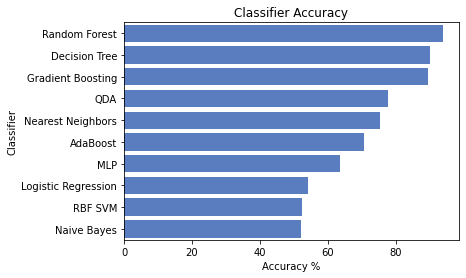

In [36]:
neural_networks_accuracy(all_data,all_labels)

In [18]:
test_list = df_test_set.values.tolist()

i=-1
for compound in test_list:
    i+=1
    test_list[i]=compound[1:]

test_array = np.array(test_list) 
test_array = np.nan_to_num(test_array)       # we replace the Nan values with zeros

print("test array dimensions" , test_array.shape)

test array dimensions (39, 277)


In [3]:
real_list = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [20]:
import time
start_time = time.time()

data = np.concatenate((lox_array, antioxidant_array))
print(data.shape)
real_labels = lox_labels + antioxidant_labels

lox_antiox_model = RandomForestClassifier()

lox_antiox_model.fit(data,real_labels)               # we train our model

pred = lox_antiox_model.predict(test_array)

print("--- %s seconds ---" % (time.time() - start_time))

print(pred)

(4852, 277)
--- 2.4050843715667725 seconds ---
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


[[25  0]
 [14  0]]
0.6410256410256411


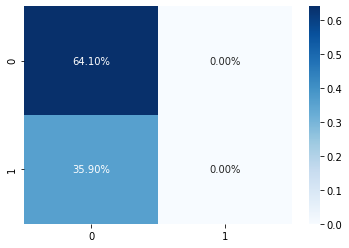

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(real_list,pred)
print(mat)

sns.heatmap(mat/np.sum(mat), annot=True, 
            fmt='.2%', cmap='Blues')

print(accuracy_score(real_list, pred))

In [21]:
lox_antiox_model = GradientBoostingClassifier()

lox_antiox_model.fit(data,real_labels)               # we train our model

pred = lox_antiox_model.predict(test_array)

print("--- %s seconds ---" % (time.time() - start_time))

print(pred)

--- 46.37043881416321 seconds ---
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2
 2 1]


[[25  0]
 [10  4]]
0.7435897435897436


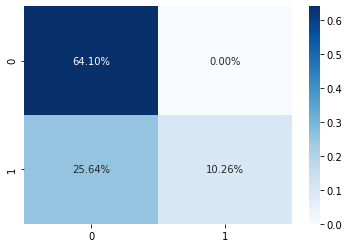

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(real_list,pred)
print(mat)

sns.heatmap(mat/np.sum(mat), annot=True, 
            fmt='.2%', cmap='Blues')

print(accuracy_score(real_list, pred))

In [22]:
lox_antiox_model = DecisionTreeClassifier()

lox_antiox_model.fit(data,real_labels)               # we train our model

pred = lox_antiox_model.predict(test_array)

print("--- %s seconds ---" % (time.time() - start_time))

print(pred)

--- 85.85285425186157 seconds ---
[1 1 2 2 2 2 1 1 2 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1
 1 1]


[[17  8]
 [11  3]]
0.5128205128205128


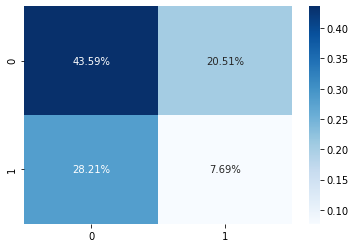

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(real_list,pred)
print(mat)

sns.heatmap(mat/np.sum(mat), annot=True, 
            fmt='.2%', cmap='Blues')

print(accuracy_score(real_list, pred))

In [23]:
lox_antiox_model = AdaBoostClassifier()

lox_antiox_model.fit(data,real_labels)               # we train our model

pred = lox_antiox_model.predict(test_array)

print("--- %s seconds ---" % (time.time() - start_time))

print(pred)

--- 109.3525083065033 seconds ---
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 2
 1 2]


[[25  0]
 [ 3 11]]
0.9230769230769231


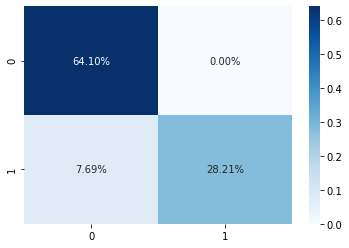

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(real_list,pred)
print(mat)

sns.heatmap(mat/np.sum(mat), annot=True, 
            fmt='.2%', cmap='Blues')

print(accuracy_score(real_list, pred))

In [24]:
lox_antiox_model = QuadraticDiscriminantAnalysis()

lox_antiox_model.fit(data,real_labels)               # we train our model

pred = lox_antiox_model.predict(test_array)

print("--- %s seconds ---" % (time.time() - start_time))

print(pred)

--- 145.28016543388367 seconds ---
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[[25  0]
 [14  0]]
0.6410256410256411


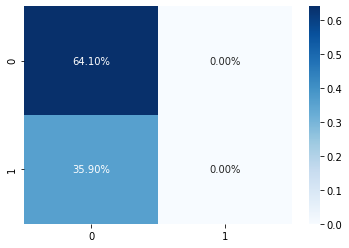

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(real_list,pred)
print(mat)

sns.heatmap(mat/np.sum(mat), annot=True, 
            fmt='.2%', cmap='Blues')

print(accuracy_score(real_list, pred))

In [42]:
start_time = time.time()

data = np.concatenate((lox_array, lox_decoy_array))
print(data.shape)
real_labels = lox_labels + lox_decoy_labels

lox_decoys_model = AdaBoostClassifier(base_estimator=RandomForestClassifier())

lox_decoys_model.fit(data,real_labels)                  # we train our model

pred = lox_decoys_model.predict(test_array)

print("--- %s seconds ---" % (time.time() - start_time))

(8182, 277)
--- 245.30715036392212 seconds ---


In [43]:
print(pred)

[3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 3 3 3 3 3 1 1 1
 3 1]


In [44]:
start_time = time.time()

data = np.concatenate((antioxidant_array, antioxidant_decoys_array))
print(data.shape)
real_labels = antioxidant_labels + antioxidant_decoys_labels

antiox_decoys_model = AdaBoostClassifier(base_estimator=RandomForestClassifier())              

antiox_decoys_model.fit(data,real_labels)               # we train our model

pred = antiox_decoys_model.predict(test_array)

print("--- %s seconds ---" % (time.time() - start_time))

(1597, 277)
--- 39.71861529350281 seconds ---


In [45]:
print(pred)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]


In [46]:
import time
start_time = time.time()

all_data = np.concatenate((lox_array, lox_decoy_array, antioxidant_array, antioxidant_decoys_array))
print(all_data.shape)
all_labels = lox_labels + lox_decoy_labels + antioxidant_labels + antioxidant_decoys_labels

all_labels_model = KNeighborsClassifier(4)              # GaussianProcessClassifier(1.0 * RBF(1.0))

all_labels_model.fit(all_data,all_labels)               # we train our model

pred = all_labels_model.predict(test_array)

print("--- %s seconds ---" % (time.time() - start_time))

(9779, 277)
--- 0.027023792266845703 seconds ---


In [47]:
print(pred)

[1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 3 3 1 1 1 3 3 3 3 3 3 3 3 3 3 4 4 4 1
 1 4]


In [48]:
import time
start_time = time.time()

all_data = np.concatenate((lox_array, lox_decoy_array, antioxidant_array, antioxidant_decoys_array))
print(all_data.shape)
all_labels = lox_labels + lox_decoy_labels + antioxidant_labels + antioxidant_decoys_labels

all_labels_model = RandomForestClassifier()             

all_labels_model.fit(all_data,all_labels)               # we train our model

pred = all_labels_model.predict(test_array)

print("--- %s seconds ---" % (time.time() - start_time))

(9779, 277)
--- 5.601177453994751 seconds ---


In [49]:
print(pred)

[3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 4 4 4 4 4 3 3 1 1 4
 4 4]


In [30]:
X_1 = df_train_LOX.iloc[:,2:]           # independent columns
X_2 = df_train_Antioxidant.iloc[:,2:]   # independent columns

X_1 = X_1.fillna(0)
X_2 = X_2.fillna(0)

labels_1 = df_train_LOX.iloc[:,1:2]
labels_2 = df_train_Antioxidant.iloc[:,1:2]

lb_frames = [labels_1, labels_2]
labels = pd.concat(lb_frames)

frames = [X_1, X_2]
data = pd.concat(frames)

print("data shape", data.shape)
print("labels shape", labels.shape)

data shape (4852, 277)
labels shape (4852, 1)


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column

0.98 accuracy with a standard deviation of 0.02


<ipython-input-26-5555be1ff6a0>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(data,labels)


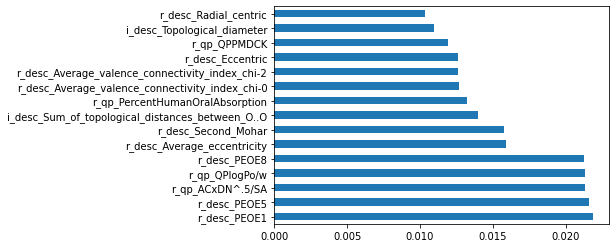

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()  # 
scores = cross_val_score(model, data, labels, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std())) 

model.fit(data,labels) 
feat_importances = pd.Series(model.feature_importances_, index=data.columns)  # plot graph of feature importances for better visualization
feat_importances.nlargest(15).plot(kind='barh')
plt.show() 

In [28]:
from sklearn.preprocessing import MinMaxScaler
from ITMO_FS.filters.univariate import chi2_measure

labels = np.array(labels)

scaler = MinMaxScaler(feature_range=(0,1))                 # we scale our data to values between 0-1 to eliminate the negative values
data_scaled = scaler.fit_transform(data)

scores = chi2_measure(data_scaled, labels)                 # Chi^2

column_names = data.columns

chi2_measure_dict = {}
i=-1
for score in scores:
    i+=1
    chi2_measure_dict[column_names[i]] = score

sorted_chi2_measure_dict = dict( sorted(chi2_measure_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_chi2_measure = pd.DataFrame.from_dict(sorted_chi2_measure_dict, orient='index') 

print(df_chi2_measure.head(15))

                                             0
i_desc_Eccentricity                   9.092838
i_desc_Number_of_ring_systems         2.949700
i_desc_Ring_Count_10                       NaN
i_desc_Ring_Count_11                       NaN
i_desc_Ring_Count_12                       NaN
i_desc_Ring_Count_13                 28.036247
i_desc_Chirality_count               10.349753
i_desc_Eccentric_connectivity         9.283296
i_desc_Atom_Count                     4.621557
i_desc_Bond_Count                     4.615564
i_desc_First_Zagreb                   4.270384
i_desc_Gutman_Molecular_Topological   3.809048
i_desc_Cyclomatic_number              3.647054
i_desc_Quadratic                      2.721309
i_desc_Polarity                       2.206254


In [46]:
from ITMO_FS.filters.univariate import information_gain

labels = np.array(labels)

scores = information_gain(data, labels)                 # Information Gain

column_names = data.columns

information_gain_dict = {}
i=-1
for score in scores:
    i+=1
    information_gain_dict[column_names[i]] = score

sorted_information_gain_dict = dict( sorted(information_gain_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_information_gain = pd.DataFrame.from_dict(sorted_information_gain_dict, orient='index') 

print(df_information_gain.head(15))

TypeError: unhashable type: 'numpy.ndarray'

In [35]:
from ITMO_FS.filters.univariate import pearson_corr

labels = np.array(labels)

scores = pearson_corr(data, labels)      # Pearson Correlation Coefficient

column_names = data.columns

pearson_corr_dict = {}
i=-1
for score in scores:
    i+=1
    pearson_corr_dict[column_names[i]] = score

sorted_pearson_corr_dict = dict( sorted(pearson_corr_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_pearson_corr = pd.DataFrame.from_dict(sorted_pearson_corr_dict, orient='index') 

print(df_pearson_corr.head(15))

                                                           0
r_qp_QPlogS                                         0.249463
r_desc_PEOE1                                        0.227446
i_desc_Sum_of_topological_distances_between_O..O    0.208837
r_desc_Total_structure_connectivity                 0.193376
r_desc_Mean_topological_charge_index_of_order_4     0.180335
r_qp_CIQPlogS                                       0.179408
r_desc_ALOGP6                                       0.175701
r_qp_FISA                                           0.173370
r_desc_Balaban-type_index_from_mass_weighted_di...  0.172163
r_desc_Balaban-type_index_from_Z_weighted_dista...  0.172042
r_desc_Balaban_distance_connectivity_index          0.169455
r_desc_Balaban-type_index_from_electronegativit...  0.166340
r_qp_ACxDN^.5/SA                                    0.152788
r_desc_PEOE12                                       0.152667
r_desc_Mean_topological_charge_index_of_order_3     0.148916


In [34]:
from ITMO_FS.filters.univariate import gini_index

labels = np.array(labels)

scores = gini_index(data, labels)      # Gini Index

column_names = data.columns

gini_index_dict = {}
i=-1
for score in scores:
    i+=1
    gini_index_dict[column_names[i]] = score

sorted_gini_index_dict = dict( sorted(gini_index_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_gini_index = pd.DataFrame.from_dict(sorted_gini_index_dict, orient='index') 

print(df_gini_index.head(15))

                                            0
i_desc_Centralization                0.199045
i_desc_Number_of_ring_systems        0.194223
i_desc_Ring_Count_10                      NaN
i_desc_Ring_Count_11                      NaN
i_desc_Ring_Count_12                      NaN
i_desc_Ring_Count_13                 0.884358
i_desc_Gutman_Molecular_Topological  0.201973
i_desc_Eccentric_connectivity        0.177729
i_desc_Eccentricity                  0.173282
i_desc_Cyclomatic_number             0.172565
i_desc_Quadratic                     0.160245
i_desc_Atoms_in_Ring_System          0.154565
i_desc_Bonds_in_Ring_System          0.153007
i_desc_First_Zagreb                  0.147788
i_desc_Bond_Count                    0.146205


C:\Users\Dimitris\anaconda3\lib\site-packages\ITMO_FS\filters\univariate\measures.py:144: RuntimeWarning: invalid value encountered in true_divide
  cum_x = np.cumsum(X / np.linalg.norm(X, 1, axis=0), axis=0)


In [36]:
from ITMO_FS.filters.univariate import f_ratio_measure

labels = np.array(labels)

scores = f_ratio_measure(data, labels)      # Fisher Ratio

column_names = data.columns

f_ratio_dict = {}
i=-1
for score in scores:
    i+=1
    f_ratio_dict[column_names[i]] = score

sorted_f_ratio_dict = dict( sorted(f_ratio_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_f_ratio = pd.DataFrame.from_dict(sorted_f_ratio_dict, orient='index') 

print(df_f_ratio.head(15))

                                                        0
r_desc_Total_structure_connectivity              0.174145
r_desc_Radial_centric                            0.070266
r_desc_PEOE1                                     0.065155
r_qp_PercentHumanOralAbsorption                  0.062023
r_desc_Eccentric                                 0.061978
r_desc_Average_eccentricity                      0.059035
r_desc_Average_valence_connectivity_index_chi-0  0.058886
r_desc_Second_Mohar                              0.057257
r_desc_Mean_Square_Distance_Balaban              0.056516
i_desc_Topological_diameter                      0.054025
r_qp_QPlogKp                                     0.052288
r_desc_Mean_Wiener                               0.051896
i_desc_Topological_radius                        0.050657
r_desc_Average_valence_connectivity_index_chi-1  0.050058
r_desc_Kier_benzene-likeliness_index             0.050017


In [41]:
data = np.concatenate((lox_array, antioxidant_array))
print(data.shape)
real_labels = lox_labels + antioxidant_labels

(4852, 277)


0.98 accuracy with a standard deviation of 0.01
[[1307    5]
 [  32  112]]


<AxesSubplot:>

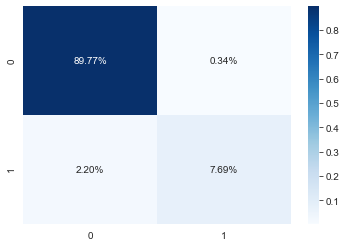

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data, real_labels, test_size=0.3,random_state=109) # 70% of our data for training and the rest 30% for testing

model = AdaBoostClassifier()                                
scores = cross_val_score(model, X_train, y_train, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model.fit(X_train, y_train)

predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test,predicted)
print(mat)

sns.heatmap(mat/np.sum(mat), annot=True, 
            fmt='.2%', cmap='Blues')

In [64]:
model = AdaBoostClassifier()

model.fit(data, real_labels)
pred = model.predict(test_array)

print("test set prediction ", pred)

test set prediction  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 2
 1 2]


In [69]:
X_1 = df_train_LOX.iloc[:,2:]           # independent columns
X_2 = df_train_Antioxidant.iloc[:,2:]   # independent columns
X_3 = df_LOX_decoys.iloc[:,2:]

X_1 = X_1.fillna(0)
X_2 = X_2.fillna(0)
X_3 = X_3.fillna(0)

labels_1 = df_train_LOX.iloc[:,1:2]
labels_2 = df_train_Antioxidant.iloc[:,1:2]
labels_3 = df_LOX_decoys.iloc[:,1:2]

lb_frames = [labels_1, labels_2, labels_3]
labels = pd.concat(lb_frames)

frames = [X_1, X_2, X_3]
data = pd.concat(frames)

print("data shape", data.shape)
print("labels shape", labels.shape)

data shape (8651, 277)
labels shape (8651, 1)


0.74 accuracy with a standard deviation of 0.10


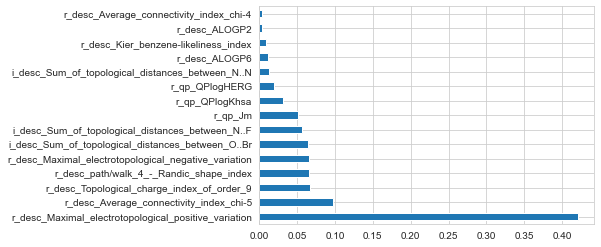

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(model, data, labels, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std())) 

model.fit(data,labels) 
feat_importances = pd.Series(model.feature_importances_, index=data.columns)  # plot graph of feature importances for better visualization
feat_importances.nlargest(15).plot(kind='barh')
plt.show() 

In [75]:
X_1 = df_train_LOX.iloc[:,2:]           # independent columns
X_2 = df_train_Antioxidant.iloc[:,2:]   # independent columns
X_4 = df_Antioxidant_decoys.iloc[:,2:]

X_1 = X_1.fillna(0)
X_2 = X_2.fillna(0)
X_4 = X_4.fillna(0)

labels_1 = df_train_LOX.iloc[:,1:2]
labels_2 = df_train_Antioxidant.iloc[:,1:2]
labels_4 = df_Antioxidant_decoys.iloc[:,1:2]

lb_frames = [labels_1, labels_2, labels_4]
labels = pd.concat(lb_frames)

frames = [X_1, X_2, X_4]
data = pd.concat(frames)

print("data shape", data.shape)
print("labels shape", labels.shape)

data shape (5980, 277)
labels shape (5980, 1)


0.80 accuracy with a standard deviation of 0.05


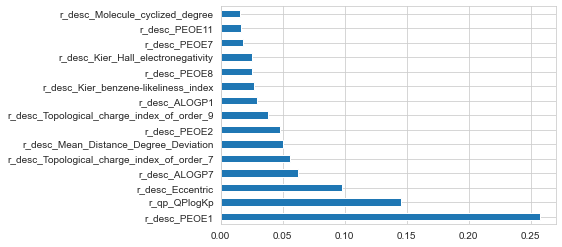

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(model, data, labels, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std())) 

model.fit(data,labels) 
feat_importances = pd.Series(model.feature_importances_, index=data.columns)  # plot graph of feature importances for better visualization
feat_importances.nlargest(15).plot(kind='barh')
plt.show() 